In [1]:
import sys
sys.path.append(r'C:\PythonVenv\PaintByNumber\Lib\site-packages')
import cv2, numpy as np, matplotlib.pyplot as plt

In [2]:
def load_image(_i_path):
    return cv2.imread(_i_path)

def natural_color(_i):
    return cv2.cvtColor(_i, cv2.COLOR_BGR2RGB)

def lab_color(_i):
    return cv2.cvtColor(_i, cv2.COLOR_BGR2LAB)

def bgr_color(_i): # from rgb
    return cv2.cvtColor(_i, cv2.COLOR_RGB2BGR)

def display_image(_i):
    plt.imshow(_i)
    plt.colorbar()
    plt.show()
    
def save_image(_i, _i_path):
    cv2.imwrite(_i_path, _i)
    
def unique_colors(_im, return_counts=False):
    return np.unique(
        _im.reshape(-1, _im.shape[2]),
        axis=0,
        return_counts=return_counts
    )

def blur(_im, radius=5):
    return cv2.blur(_im, (radius, radius))

def invert(_im):
    return np.logical_not(_im)

def foreground_extractor(image, rectangle):
    #https://www.geeksforgeeks.org/python-foreground-extraction-in-an-image-using-grabcut-algorithm/
    mask = np.zeros(image.shape[:2], np.uint8)
    backgroundModel = np.zeros((1, 65), np.float64)
    foregroundModel = np.zeros((1, 65), np.float64)
    cv2.grabCut(image, mask, rectangle, 
                backgroundModel, foregroundModel,
                3, cv2.GC_INIT_WITH_RECT)
    mask2 = np.where((mask == 2)|(mask == 0), 0, 1).astype('uint8')
    image = image * mask2[:, :, np.newaxis]
    return image, mask2

def buffer_mask(_mask, buffer=3):
    mask_255 = _mask * 255
    mask_255_blur = cv2.blur(mask_255, (buffer, buffer))
    mask_255_blur[mask_255_blur>0]=1
    return mask_255_blur

def smooth_mask(_m, factor):
    _m_255 = _m * 255
    _m_255_blur = cv2.blur(_m_255, (factor, factor))
    _m_255_blur[_m_255_blur*2<=255] = 0
    _m_255_blur[_m_255_blur*2>255] = 1
    return _m_255_blur

def unique_colors(_im, return_counts=False):
    return np.unique(
        _im.reshape(-1, _im.shape[2]),
        axis=0,
        return_counts=return_counts
    )

def blur(_im, radius=5):
    return cv2.blur(_im, (radius, radius))

def invert(_im):
    return np.logical_not(_im)

def mask_image(_img, _mask):
    return _mask[:, :, np.newaxis]*_img

def mask_or(mask1, mask2):
    return np.maximum(mask1, mask2)

In [3]:
def segment_kmeans(_im, k=30):
    pixel_values = _im.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, .3)
    _, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    centers = np.uint8(centers)
    labels = labels.flatten()
    segmented_image = centers[labels.flatten()]
    return segmented_image.reshape(_im.shape)

In [4]:
def resize(_im, _factor):
    return cv2.resize(
        _im,
        dsize=(
            int(_factor * _im.shape[1]),
            int(_factor * _im.shape[0]),
        ),
        interpolation=cv2.INTER_NEAREST
    )

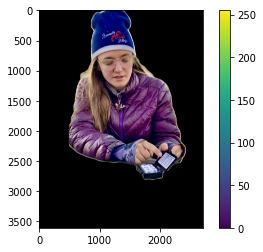

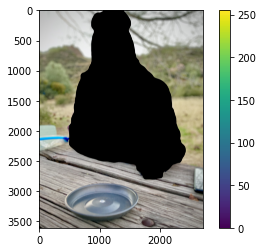

In [11]:
foreground = load_image(r"_meagan\foreground.png")
background = load_image(r"_meagan\background.png")
display_image(natural_color(foreground))
display_image(natural_color(background))

In [16]:
foreground_small = resize(foreground, _factor=0.25)
background_small = resize(background, _factor=0.25)
print(foreground.shape)
print(foreground_small.shape)
save_image(foreground_small, r"_meagan\foreground_small.png")
save_image(background_small, r"_meagan\background_small.png")

(3606, 2707, 3)
(901, 676, 3)


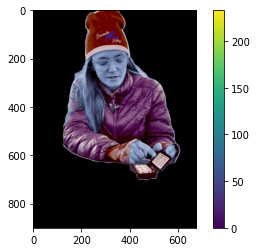

In [20]:
kf = 25
seg_f = segment_kmeans(foreground_small, kf)
display_image(seg_f)
save_image(seg_f, r"_meagan\seg_f_{}.png".format(kf))

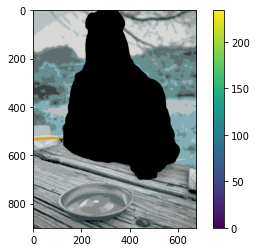

In [21]:
kb = 10
seg_b = segment_kmeans(background_small, kb)
display_image(seg_b)
save_image(seg_b, r"_meagan\seg_b_{}.png".format(kb))

In [23]:
from skimage import color

lab = color.rgb2lab(background, illuminant='D50')

In [58]:
kf = 25
lab_f = color.rgb2lab(foreground, illuminant='D50')
seg_f_lab = segment_kmeans(lab_f + 90, kf).astype(float)
seg_f_lab_rgb = color.lab2rgb(seg_f_lab - 90, illuminant='D50')

In [60]:
save_image(seg_f_lab_rgb*255, r"_meagan\seg_f_lab_rgb_{}.png".format(kf))

In [76]:
kb = 15
b_small_lab = color.rgb2lab(background_small, illuminant='D50')
seg_b_small_lab = segment_kmeans(b_small_lab + 90, kb).astype(float)
seg_b_small_lab_rgb = color.lab2rgb(seg_b_small_lab - 90, illuminant='D50')
save_image(seg_b_small_lab_rgb*255, r"_meagan\seg_b_small_lab_rgb_{}.png".format(kb))

In [80]:
kf = 25
f_small_lab = color.rgb2lab(foreground_small, illuminant='D50')
seg_f_small_lab = segment_kmeans(f_small_lab + 90, kf).astype(float)
seg_f_small_lab_rgb = color.lab2rgb(seg_f_small_lab - 90, illuminant='D50')
save_image(seg_f_small_lab_rgb*255, r"_meagan\seg_f_small_lab_rgb_{}.png".format(kf))